<a href="https://colab.research.google.com/github/someshsingh22/News-Propaganda-Detection/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### IMPORTS

In [31]:
# Import necessary libraries
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations
import warnings
warnings.filterwarnings('ignore')

### LOAD DATA

In [2]:
directory='datasets/train-labels-task2-technique-classification'
List=[]
for file in (os.listdir(directory)):
    List.append(open('{}/{}'.format(directory,file)).read().split('\n'))

Flat_type=[]
Flat_len=[]
for doc in List :
    for line in doc :
        split=line.split('\t')
        if not split[1:] == []:
            Flat_type.append(split[1])
            Flat_len.append(int(split[3])-int(split[2]))

### DATA DISTRIBUTION

In [3]:
# General 
df=pd.DataFrame({'Type' : Flat_type, 'Length' : Flat_len})
df.describe()

Length
count  6369.000000
mean     48.630397
std      62.523064
min       3.000000
25%      14.000000
50%      25.000000
75%      54.000000
max     799.000000

In [4]:
df.groupby(['Type']).describe()

Length                                \
                                     count        mean         std   min   
Type                                                                       
Appeal_to_Authority                  155.0  134.864516  125.407185  12.0   
Appeal_to_fear-prejudice             321.0   97.523364   76.104124   4.0   
Bandwagon,Reductio_ad_hitlerum        77.0   98.038961   72.203922  15.0   
Black-and-White_Fallacy              112.0  105.401786   76.693547  10.0   
Causal_Oversimplification            212.0  124.160377   73.018421  17.0   
Doubt                                496.0  124.931452   97.583341   4.0   
Exaggeration,Minimisation            493.0   45.125761   33.267095   3.0   
Flag-Waving                          250.0   63.144000   65.349626   3.0   
Loaded_Language                     2200.0   24.807727   26.549512   3.0   
Name_Calling,Labeling               1105.0   26.637104   20.303617   3.0   
Repetition                           621.0   17.985507   20.185705   3.0   
Slogans                              138.0   25.579710   13.395615   4.0   
Thought-terminating_Cliches           80.0   31.187500   23.032775   7.0   
Whataboutism,Straw_Men,Red_Herring   109.0   97.596330   64.422236   5.0   

                                                                 
                                      25%    50%     75%    max  
Type                                                             
Appeal_to_Authority                 53.00   92.0  176.50  712.0  
Appeal_to_fear-prejudice            37.00   78.0  139.00  444.0  
Bandwagon,Reductio_ad_hitlerum      42.00   81.0  129.00  360.0  
Black-and-White_Fallacy             48.00   88.0  133.00  344.0  
Causal_Oversimplification           73.75  111.0  156.25  438.0  
Doubt                               54.50   98.0  175.00  799.0  
Exaggeration,Minimisation           21.00   37.0   58.00  231.0  
Flag-Waving                         16.00   40.0   86.00  400.0  
Loaded_Language                     11.00   18.0   29.00  541.0  
Name_Calling,Labeling               14.00   21.0   33.00  192.0  
Repetition                           8.00   13.0   18.00  190.0  
Slogans                             16.00   23.0   30.00   73.0  
Thought-terminating_Cliches         17.00   24.0   36.25  105.0  
Whataboutism,Straw_Men,Red_Herring  45.00   87.0  135.00  390.0

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

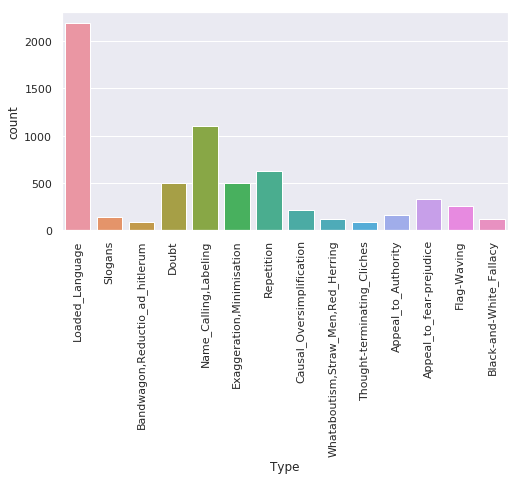

In [5]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(x='Type', data=df)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

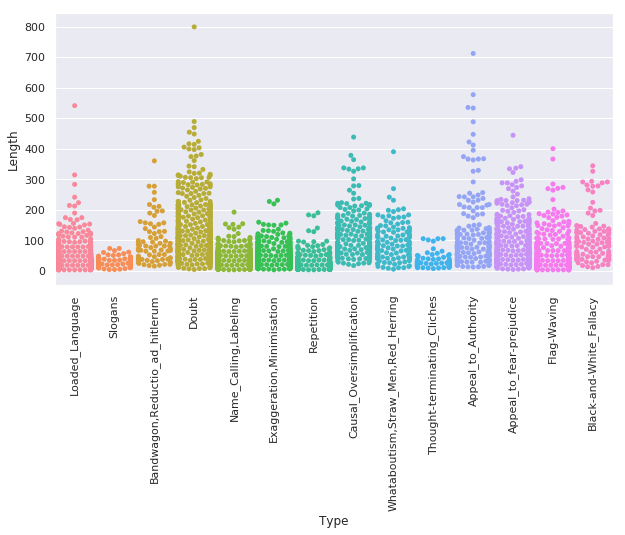

In [6]:
fig, ax = plt.subplots(figsize=(10,5))
sns.swarmplot(x='Type', y='Length', data=df)
plt.xticks(rotation=90)

### PROPAGANDA SPLIT

In [7]:
spans=dict()
for i in set(df['Type']):
    spans[i]=df[df['Type']==i]

In [8]:
props=list(set(df['Type']))

### PROP-Comparisions

In [11]:
data_percentiles=dict()
for propaganda in spans.keys():
    lens=[]
    for i in range(1,100):
        lens.append(int(spans[propaganda].quantile(i/100)))
    data_percentiles[propaganda]=lens
data_percentiles=pd.DataFrame(data_percentiles)

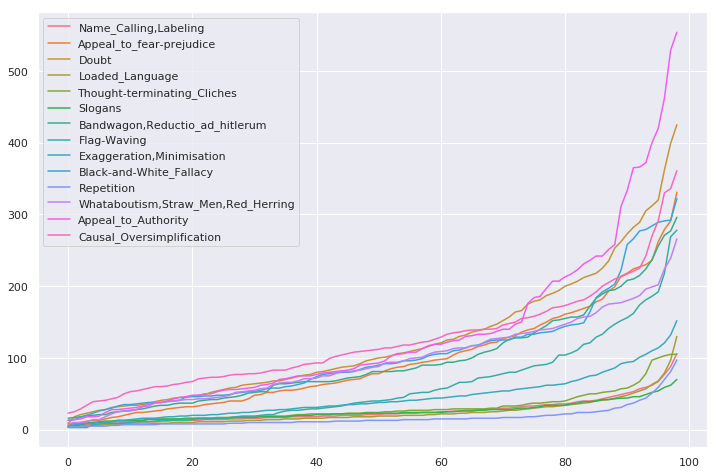

In [12]:
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(data=data_percentiles,dashes=False)

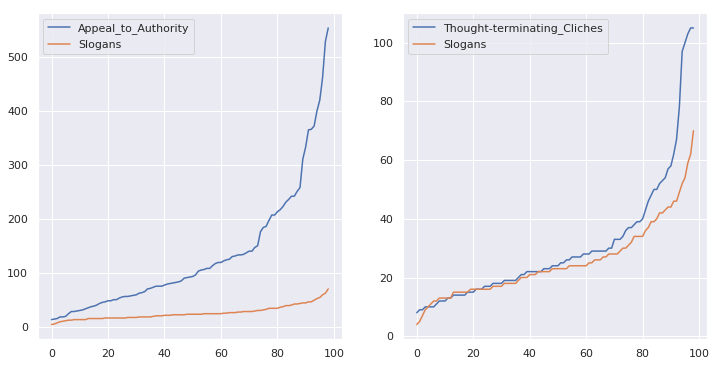

In [49]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
options=[['Appeal_to_Authority','Slogans'],['Bandwagon,Reductio_ad_hitlerum','Slogans']]
sns.lineplot(data=data_percentiles[options[0]],dashes=False ,ax=ax[0])
sns.lineplot(data=data_percentiles[options[1]],dashes=False ,ax=ax[1])

In [46]:
fig, ax = plt.subplots(ncols=14,nrows=14,figsize=(256,256))
for x in range(14):
    for y in range(14):
        if not x==y:
            options=[props[x],props[y]]
            sns.lineplot(data=data_percentiles[options],dashes=False, ax=ax[x,y])
            sns.lineplot(data=data_percentiles[options],dashes=False, ax=ax[y,x])